In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Data Preprocessing
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
# Dalam clustering, tidak ada dependent variable

# Columns of "Mall_Customers.csv" :
# Gender : Gender of the customer
# Age : Age of the customer
# Annual Income (k$) : Annual Income of the customer
# Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

# Dalam nb ini, hanya diambil 2 kolom yaitu Annual Income dan Spending Score

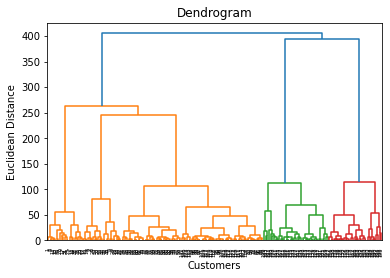

In [26]:
# Membuat dendogram

# Dendrogram dibuat dengan library yang berbeda, yaitu scipy
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [27]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

# Dari dendrogram, threshold yang dipilih adalah 300 (3 cluster)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# n_clusters = jumlah cluster yang diinginkan
# affinity = metode perhitungan jarak antar data point
# linkage = metode perhitungan jarak antar cluster, [single, complete, average, ward]
y_hc = hc.fit_predict(X)

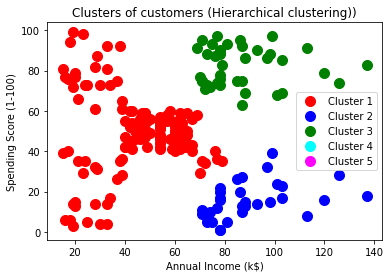

In [28]:
# Visualizing the clusters
# Plotting area colors
# x1, x2 = np.meshgrid(np.arange(start=X[:, 0].min()-1, stop=X[:, 0].max()+1, step=1),
#                       np.arange(start=X[:, 1].min()-1, stop=X[:, 1].max()+1, step=1))
# plt.contourf(x1, x2, hc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap='rainbow')

# Plotting the clusters
plt.scatter(X[hc.labels_ == 0, 0], X[hc.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[hc.labels_ == 1, 0], X[hc.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[hc.labels_ == 2, 0], X[hc.labels_ == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[hc.labels_ == 3, 0], X[hc.labels_ == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[hc.labels_ == 4, 0], X[hc.labels_ == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the title and axis
plt.title('Clusters of customers (Hierarchical clustering))')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()